<a href="https://colab.research.google.com/github/Shivp55/ComputerVision/blob/main/Imagewoof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import random
import shutil
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
import os
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
pip install split-folders

In [3]:
import splitfolders

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import shutil

# Source and destination folder paths
source_folder_path = "/content/drive/MyDrive/imagewoof-320"
destination_folder_path = "/content/drive/MyDrive/imagewoof_1"

# Copy the folder recursively
shutil.copytree(source_folder_path, destination_folder_path)


'/content/drive/MyDrive/imagewoof_1'

##Splitting the Data

In [8]:
import os
import shutil

# Define paths to validation and training folders
validation_folder = "/content/drive/MyDrive/imagewoof_1/val"
training_folder = "/content/drive/MyDrive/imagewoof_1/train"

# Iterate over class folders in the validation folder
for class_folder in os.listdir(validation_folder):
    class_folder_path = os.path.join(validation_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Check if the corresponding class folder exists in the training folder
        training_class_folder_path = os.path.join(training_folder, class_folder)
        if os.path.exists(training_class_folder_path):
            # Iterate over files in the class folder of the validation set
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                # Copy the file to the corresponding class folder in the training set
                shutil.copy(file_path, training_class_folder_path)
            print(f"Files from '{class_folder}' in the validation set copied to training set.")
        else:
            print(f"Corresponding class folder '{class_folder}' does not exist in the training set.")
    else:
        print(f"'{class_folder}' is not a folder.")

print("Copy process completed.")


Files from 'n02111889' in the validation set copied to training set.
Files from 'n02089973' in the validation set copied to training set.
Files from 'n02099601' in the validation set copied to training set.
Files from 'n02087394' in the validation set copied to training set.
Files from 'n02088364' in the validation set copied to training set.
Files from 'n02115641' in the validation set copied to training set.
Files from 'n02086240' in the validation set copied to training set.
Files from 'n02105641' in the validation set copied to training set.
Files from 'n02096294' in the validation set copied to training set.
Files from 'n02093754' in the validation set copied to training set.
Copy process completed.


In [9]:
import os
import shutil
import splitfolders

# Define paths

data_folder = '/content/drive/MyDrive/imagewoof_1'  # Update this with the path to your data folder
output_folder = '/content/drive/MyDrive/imagewoof_final_split'


train_folder = os.path.join(data_folder, 'train')


# Step 3: Count number of images in each class folder
class_image_count = {}
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        class_image_count[class_folder] = num_images

# Step 4: Sort classes based on the number of images
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1])

# Step 5: Delete the classes with the lowest number of images (4 classes)
num_classes_to_delete = 6
classes_to_delete = [class_name for class_name, _ in sorted_classes[:num_classes_to_delete]]

for class_name in classes_to_delete:
    class_path = os.path.join(train_folder, class_name)
    shutil.rmtree(class_path)
    print(f"Deleted class: {class_name}")


# Step 6: Split data into train, validation, and test sets
splitfolders.ratio(train_folder, output=output_folder, seed=42, ratio=(0.70, 0.15, 0.15))

print("Data processing completed successfully.")


Deleted class: n02089973
Deleted class: n02111889
Deleted class: n02099601
Deleted class: n02088364
Deleted class: n02105641
Deleted class: n02087394


Copying files: 5400 files [01:39, 54.09 files/s]

Data processing completed successfully.


In [10]:
# Define the paths to the ImageNet datasets
dataset_paths = {
    'train': '/content/drive/MyDrive/imagewoof_final_split/train',
    'val': '/content/drive/MyDrive/imagewoof_final_split/val',
    'test': '/content/drive/MyDrive/imagewoof_final_split/test'
}

# Function to count the number of images in each class
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images
    return class_counts

# Iterate over dataset paths and count images for each
for split, path in dataset_paths.items():
    print(f"Number of images per class in {split} set:")
    class_counts = count_images_per_class(path)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")

Number of images per class in train set:
n02096294: 944
n02086240: 944
n02093754: 944
n02115641: 944
Number of images per class in val set:
n02096294: 202
n02086240: 202
n02093754: 202
n02115641: 202
Number of images per class in test set:
n02096294: 204
n02086240: 204
n02093754: 204
n02115641: 204


In [ ]:
# Dictionary mapping original labels to new labels
label_mapping = {
    'n03425413': 'gas_station',
    'n03888257': 'parachute',
    'n03445777':'golf',
    'n03394916':'horn',
    'n03028079':'church',
    'n03417042':'garbage_truck'
}

# List of data folders
data_folders = ['train', 'val', 'test']

# Path to your main dataset folder
main_dataset_folder_path = '/content/Imagenet_final'

# Iterate through each data folder
for data_folder in data_folders:
    # Path to the specific data folder (train, validation, or test)
    dataset_folder_path = os.path.join(main_dataset_folder_path, data_folder)

    # Iterate through folders and rename them
    for original_label, new_label in label_mapping.items():
        original_folder_path = os.path.join(dataset_folder_path, original_label)
        new_folder_path = os.path.join(dataset_folder_path, new_label)
        os.rename(original_folder_path, new_folder_path)
        print(f"Renamed folder '{original_label}' in '{data_folder}' to '{new_label}'")

print("Folder renaming complete.")


Renamed folder 'n03425413' in 'train' to 'gas_station'
Renamed folder 'n03888257' in 'train' to 'parachute'
Renamed folder 'n03445777' in 'train' to 'golf'
Renamed folder 'n03394916' in 'train' to 'horn'
Renamed folder 'n03028079' in 'train' to 'church'
Renamed folder 'n03417042' in 'train' to 'garbage_truck'
Renamed folder 'n03425413' in 'val' to 'gas_station'
Renamed folder 'n03888257' in 'val' to 'parachute'
Renamed folder 'n03445777' in 'val' to 'golf'
Renamed folder 'n03394916' in 'val' to 'horn'
Renamed folder 'n03028079' in 'val' to 'church'
Renamed folder 'n03417042' in 'val' to 'garbage_truck'
Renamed folder 'n03425413' in 'test' to 'gas_station'
Renamed folder 'n03888257' in 'test' to 'parachute'
Renamed folder 'n03445777' in 'test' to 'golf'
Renamed folder 'n03394916' in 'test' to 'horn'
Renamed folder 'n03028079' in 'test' to 'church'
Renamed folder 'n03417042' in 'test' to 'garbage_truck'
Folder renaming complete.


In [12]:
#Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


#Building a Fine Tuned Model
#generators
batch_size=32

train_datagen= ImageDataGenerator(
      rescale=1./255,
    rotation_range=45,  # Increase rotation range
    shear_range=0.3,    # Increase shear range
    zoom_range=0.3,     # Increase zoom range
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
)
val_datagen= ImageDataGenerator(
     rescale=1./255,
    rotation_range=45,  # Increase rotation range
    shear_range=0.3,    # Increase shear range
    zoom_range=0.3,     # Increase zoom range
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [26]:
#Generate Augmented Data
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagewoof_final_split/train',
    target_size=(299,299),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
'/content/drive/MyDrive/imagewoof_final_split/val',
 target_size=(299, 299),
 batch_size=32,
 class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagewoof_final_split/test',
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical'
)

Found 3776 images belonging to 4 classes.
Found 808 images belonging to 4 classes.
Found 816 images belonging to 4 classes.


In [31]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top 2 Inception blocks (mixed 8 and mixed 9)
for layer in base_model.layers:
    if 'mixed8' in layer.name or 'mixed9' in layer.name:
        layer.trainable = True

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_658 (Conv2D)         (None, 149, 149, 32)         864       ['input_10[0][0]']            
                                                                                                  
 batch_normalization_658 (B  (None, 149, 149, 32)         96        ['conv2d_658[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_658 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_65

In [ ]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None
)

<ipython-input-32-206a1d09440d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(


Epoch 1/10
100/100 [==============================] - 136s 1s/step - loss: 0.2819 - accuracy: 0.9156 - val_loss: 0.1285 - val_accuracy: 0.9554
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 0.1680 - accuracy: 0.9434 - val_loss: 0.1089 - val_accuracy: 0.9678
Epoch 3/10
100/100 [==============================] - 110s 1s/step - loss: 0.1489 - accuracy: 0.9519 - val_loss: 0.3108 - val_accuracy: 0.9035
Epoch 4/10
100/100 [==============================] - 128s 1s/step - loss: 0.1249 - accuracy: 0.9572 - val_loss: 0.1441 - val_accuracy: 0.9530
Epoch 5/10
100/100 [==============================] - 110s 1s/step - loss: 0.1453 - accuracy: 0.9503 - val_loss: 0.1751 - val_accuracy: 0.9455
Epoch 6/10
100/100 [==============================] - 128s 1s/step - loss: 0.1093 - accuracy: 0.9625 - val_loss: 0.1407 - val_accuracy: 0.9493
Epoch 7/10
100/100 [==============================] - 110s 1s/step - loss: 0.1030 - accuracy: 0.9628 - val_loss: 0.1074 - val_accuracy: 0.9604

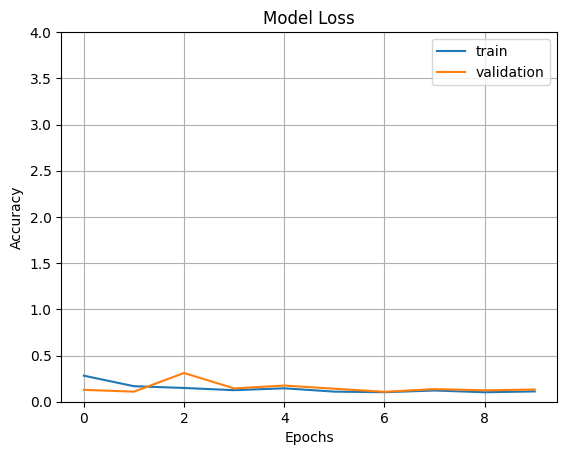

In [33]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

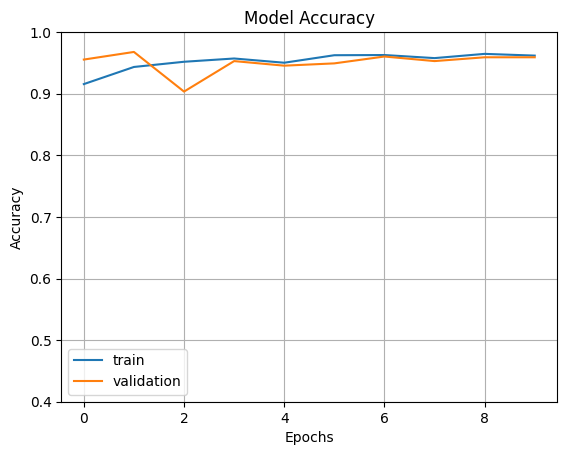

In [34]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(
 '/content/drive/MyDrive/imagewoof_final_split/test',
 target_size=(299, 299),
 batch_size=16,
 class_mode='categorical')
results = model.evaluate_generator(
 test_generator,
 steps=1000)
print('Final test accuracy:', (results[1]*100.0))

Found 816 images belonging to 4 classes.


<ipython-input-35-89dc96f8d395>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(


Final test accuracy: 97.18137383460999


In [36]:
#Saving baseline model as h5 format
model.save('/content/drive/MyDrive/models/Fine_tuned_InceptionV3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np


img = cv2.imread('/content/t.jpeg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict(img)

print(classes)

1/1 [==============================] - 0s 39ms/step
[[1. 0. 0. 0. 0. 0.]]


In [ ]:
#Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Building a Fine Tuned Model
#generators
batch_size=32

train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Generate Augmented Data
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/train',
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
'/content/drive/MyDrive/Imagenette/val',
 target_size=(64, 64),
 batch_size=batch_size,
 class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/test',
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical'
)

Found 5664 images belonging to 6 classes.
Found 1212 images belonging to 6 classes.
Found 1224 images belonging to 6 classes.


In [ ]:
#Build Model
#Building Baseline CNN Model

model = Sequential()

#Add Convolution Layers -32 filters
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',dilation_rate=(1,1), strides=(1,1),activation='relu', input_shape=(64,64,3), kernel_regularizer=tf.keras.regularizers.l2(0.03)))
#model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',dilation_rate=(1,1), strides=(1,1),activation='relu'))
#model.add(BatchNormalization())
#Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Convolution Layers -64 filters
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='he_normal',strides=(1,1),activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='he_normal',strides=(1,1),activation='relu'))
#model.add(BatchNormalization())
#Add Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layers into 1D
model.add(Flatten())

#Fully Connected Nueral Network
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

#Model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_57 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                               

In [ ]:
#compile fine tuned model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

<ipython-input-135-3e8b28a379df>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(


Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 1.9255 - accuracy: 0.5487

50/50 [==============================] - 57s 1s/step - loss: 1.9255 - accuracy: 0.5487 - val_loss: 1.8581 - val_accuracy: 0.5817
Epoch 2/30
50/50 [==============================] - 35s 691ms/step - loss: 1.7655 - accuracy: 0.6087
Epoch 3/30
50/50 [==============================] - 34s 665ms/step - loss: 1.7354 - accuracy: 0.5713
Epoch 4/30
50/50 [==============================] - 33s 657ms/step - loss: 1.6560 - accuracy: 0.6231
Epoch 5/30
50/50 [==============================] - 34s 680ms/step - loss: 1.6017 - accuracy: 0.6281
Epoch 6/30
50/50 [==============================] - 34s 673ms/step - loss: 1.5532 - accuracy: 0.6294
Epoch 7/30
50/50 [==============================] - 35s 699ms/step - loss: 1.5028 - accuracy: 0.6363
Epoch 8/30
50/50 [==============================] - 33s 654ms/step - loss: 1.4526 - accuracy: 0.6494
Epoch 9/30
50/50 [==============================] - 34s 675ms/step - loss: 1.4161 - accuracy: 0.6637
Epoch 10/30
50/50 [==============================] - 34s 670ms/

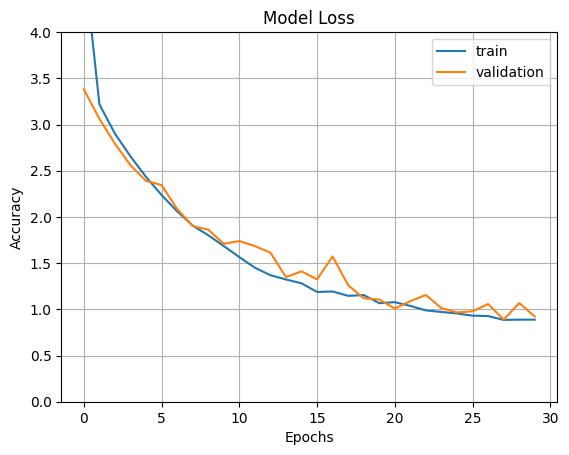

In [ ]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

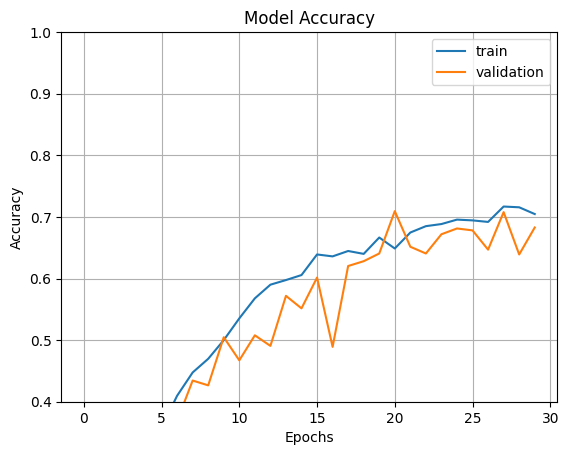

In [ ]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
 '/content/drive/MyDrive/Imagenette/test',
 target_size=(64, 64),
 batch_size=20,
 class_mode='categorical')
results = model.evaluate_generator(
 test_generator,
 steps=1000)
print('Final test accuracy:', (results[1]*100.0))

Found 1224 images belonging to 6 classes.


<ipython-input-129-a1fe71b6bca9>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(


Final test accuracy: 67.15686321258545


In [12]:
import shutil
import os

# Define the folder path you want to delete
folder_path = '/content/drive/MyDrive/imagewoof'

# Function to delete a folder recursively
def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' successfully deleted.")
    except Exception as e:
        print(f"Error deleting folder: {e}")

# Check if the folder exists
if os.path.exists(folder_path):
    # Delete the folder
    delete_folder(folder_path)
else:
    print(f"The folder '{folder_path}' does not exist.")


Error deleting folder: [Errno 2] No such file or directory: 'val'
